In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../dataset/dataset_1.csv", sep = ";").drop("Unnamed: 0", 1)
train = pd.read_csv("../dataset/train_1.csv", sep = ";").drop("Unnamed: 0", 1)
test = pd.read_csv("../dataset/test_1.csv", sep = ";").drop("Unnamed: 0", 1)
data.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_LINGUA,Q005,NIVEL_MT
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,2.197094e+01,1.068572e+00,2.139669e+00,1.389569e+00,2.869310e+00,1.449150e+00,5.271628e-01,3.894223e+00,2.500374e-01
std,7.183446e+00,4.164400e-01,1.012008e+00,4.992919e-01,3.971679e+00,6.148688e-01,4.992617e-01,1.474267e+00,4.330344e-01
min,1.600000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,1.900000e+01,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00
75%,2.300000e+01,1.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00
max,9.200000e+01,4.000000e+00,5.000000e+00,4.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00


### Creating variables

#### House Income per capita

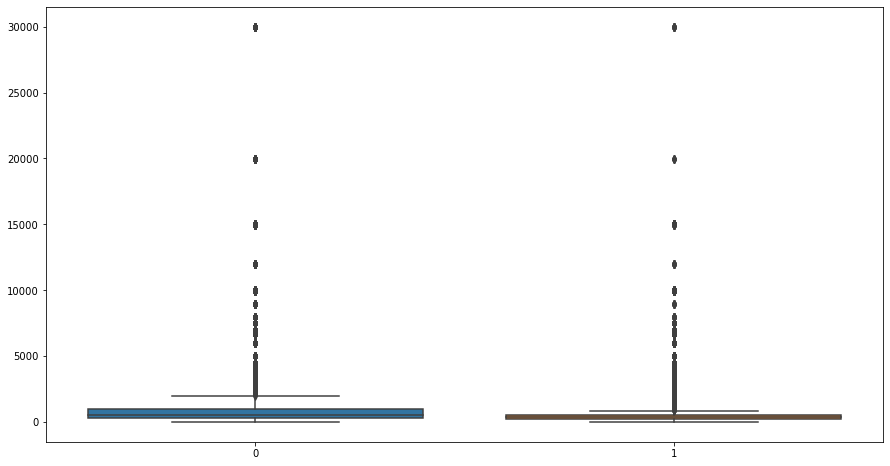

In [3]:
def mapea_per_capta(data):
    renda = data["Q006"]
    capta = data["Q005"]
    if renda == "A":
        return 0
    if renda == "B":
        return 998/capta    
    if renda == "C":
        return 1497/capta
    if renda == "D":
        return 1996/capta  
    if renda == "E":
        return 2495/capta  
    if renda == "F":
        return 2994/capta   
    if renda == "G":
        return 3992/capta
    if renda == "H":
        return 4990/capta 
    if renda == "I":
        return 5988/capta
    if renda == "J":
        return 6986/capta  
    if renda == "K":
        return 7984/capta  
    if renda == "L":
        return 8982/capta  
    if renda == "M":
        return 9980/capta
    if renda == "N":
        return 11976/capta 
    if renda == "O":
        return 14970/capta
    if renda == "P":
        return 19960/capta
    if renda == "Q":
        return 30000/capta 
    
data["Renda_per_capta"] = data.apply(mapea_per_capta, 1)
train["Renda_per_capta"] = train.apply(mapea_per_capta, 1)
test["Renda_per_capta"] = test.apply(mapea_per_capta, 1)

plt.figure(figsize=(15, 8))
sns.boxplot(x = train["NIVEL_MT"], y = train["Renda_per_capta"])
plt.xlabel("")
plt.ylabel("")
plt.savefig("../pictures/Distribuicao_niveis_por_renda_per_capta.png")

#### Region

In [4]:
def mapea_estados(estado):
    if estado in ["AC", "AP", "AM", "PA", "RO", "RR", "TO"]:
        return "Norte"
    if estado in ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]:
        return "Nordeste"
    if estado in ["GO", "MT", "MS", "DF"]:
        return "Centro_Oeste"
    if estado in ["ES", "SP", "RJ", "MG"]:
        return "Sudeste"
    if estado in ["PR", "RS", "SC"]:
        return "Sul"
    
data["Regiao"] = data["SG_UF_RESIDENCIA"].apply(mapea_estados, 1)
train["Regiao"] = train["SG_UF_RESIDENCIA"].apply(mapea_estados, 1)
test["Regiao"] = test["SG_UF_RESIDENCIA"].apply(mapea_estados, 1)

#### People per room

In [5]:
def mapea_pessoas_por_quarto(data):
    if data["Q009"] == "A":
        return 0
    if data["Q009"] == "B":
        return data["Q005"]
    if data["Q009"] == "C":
        return data["Q005"]/2
    if data["Q009"] == "D":
        return data["Q005"]/3
    if data["Q009"] == "E":
        return data["Q005"]/4
    
data["Pessoas_por_quarto"] = data.apply(mapea_pessoas_por_quarto, 1)
train["Pessoas_por_quarto"] = train.apply(mapea_pessoas_por_quarto, 1)
test["Pessoas_por_quarto"] = test.apply(mapea_pessoas_por_quarto, 1)

### Treating variables

In [6]:
data.dtypes

NU_IDADE                int64
SG_UF_RESIDENCIA       object
TP_SEXO                object
TP_ESTADO_CIVIL         int64
TP_COR_RACA             int64
TP_ST_CONCLUSAO         int64
TP_ANO_CONCLUIU         int64
TP_ESCOLA               int64
TP_LINGUA               int64
Q001                   object
Q002                   object
Q003                   object
Q004                   object
Q005                    int64
Q006                   object
Q007                   object
Q008                   object
Q009                   object
Q010                   object
Q011                   object
Q012                   object
Q013                   object
Q014                   object
Q015                   object
Q016                   object
Q017                   object
Q018                   object
Q019                   object
Q020                   object
Q021                   object
Q022                   object
Q023                   object
Q024                   object
Q025      

In [7]:
# Converting category columns to integers
for col in data.columns:
    if col != "Renda_per_capta" and col != "Pessoas_por_quarto":
        data[col] = pd.factorize(data[col], sort = True)[0]
        train[col] = pd.factorize(train[col], sort = True)[0]
        test[col] = pd.factorize(test[col], sort = True)[0]
data.dtypes

NU_IDADE                int64
SG_UF_RESIDENCIA        int64
TP_SEXO                 int64
TP_ESTADO_CIVIL         int64
TP_COR_RACA             int64
TP_ST_CONCLUSAO         int64
TP_ANO_CONCLUIU         int64
TP_ESCOLA               int64
TP_LINGUA               int64
Q001                    int64
Q002                    int64
Q003                    int64
Q004                    int64
Q005                    int64
Q006                    int64
Q007                    int64
Q008                    int64
Q009                    int64
Q010                    int64
Q011                    int64
Q012                    int64
Q013                    int64
Q014                    int64
Q015                    int64
Q016                    int64
Q017                    int64
Q018                    int64
Q019                    int64
Q020                    int64
Q021                    int64
Q022                    int64
Q023                    int64
Q024                    int64
Q025      

In [8]:
def convert(x):
    if x == 7: return -1
    else: return x

for col in ["Q001", "Q002"]:
    data[col] = data[col].apply(convert, 1)
    data[col] = pd.factorize(data[col], sort = True)[0]
    train[col] = train[col].apply(convert, 1)
    train[col] = pd.factorize(train[col], sort = True)[0]
    test[col] = test[col].apply(convert, 1)
    test[col] = pd.factorize(test[col], sort = True)[0]
    
def convert(x):
    if x == 5: return -1
    else: return x

for col in ["Q003", "Q004"]:
    data[col] = data[col].apply(convert, 1)
    data[col] = pd.factorize(data[col], sort = True)[0]
    train[col] = train[col].apply(convert, 1)
    train[col] = pd.factorize(train[col], sort = True)[0]
    test[col] = test[col].apply(convert, 1)
    test[col] = pd.factorize(test[col], sort = True)[0]

In [9]:
# Stardarizing numeric variables

mean = data["Renda_per_capta"].mean()
std = data["Renda_per_capta"].std()
data["Renda_per_capta"] = (data["Renda_per_capta"]-mean)/std
train["Renda_per_capta"] = (train["Renda_per_capta"]-mean)/std
test["Renda_per_capta"] = (test["Renda_per_capta"]-mean)/std

mean = data["Pessoas_por_quarto"].mean()
std = data["Pessoas_por_quarto"].std()
data["Pessoas_por_quarto"] = (data["Pessoas_por_quarto"]-mean)/std
train["Pessoas_por_quarto"] = (train["Pessoas_por_quarto"]-mean)/std
test["Pessoas_por_quarto"] = (test["Pessoas_por_quarto"]-mean)/std

### Saving data

In [10]:
data.to_csv("../dataset/dataset_2.csv", sep = ";")
train.to_csv("../dataset/train_2.csv", sep = ";")
test.to_csv("../dataset/test_2.csv", sep = ";")